# Auto-MPG


- The data concerns city-cycle fuel consumption in miles per gallon,to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data 
* mention the column name

In [131]:
auto=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                 sep='\s+',header=None,
        names=['mpg', 'cylinders','displacement','horsepower','weight', 'acceleration','model_year','origin','car_name'])

print(auto.shape)

(406, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


# Clean the data

. since horsepower has missing data so drop them

In [144]:
# drop the missing vales of column 
auto=auto.dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,18,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,15,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,18,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,16,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,17,3449.0,10.5,70.0,1.0,ford torino


In [145]:
# Describe the data
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [146]:
# lets take mpg 
auto['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

- min vale is 9 and max value is 46

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


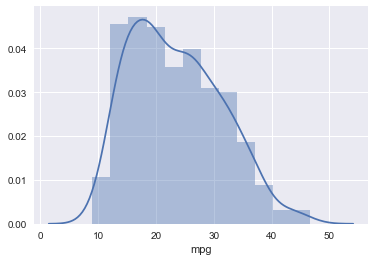

In [147]:
sns.distplot(auto['mpg'])

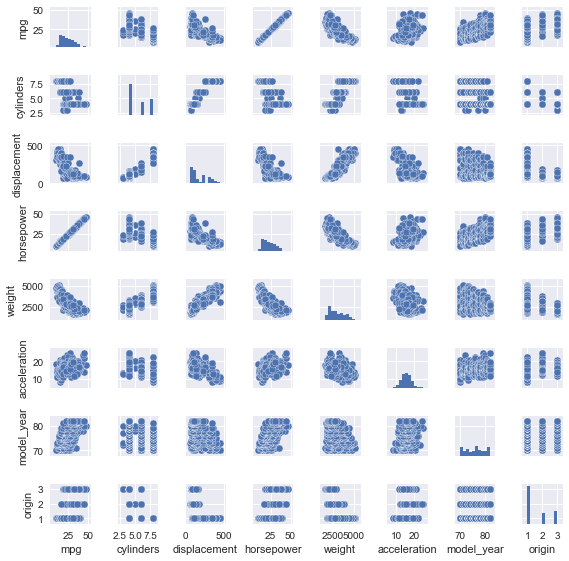

In [166]:
sns.pairplot(auto,size=1.0)
plt.show()

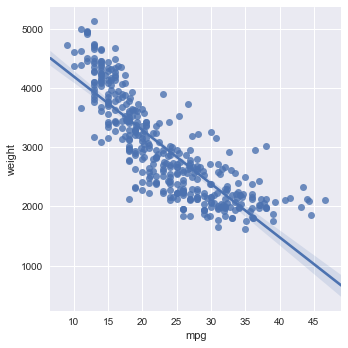

In [167]:
sns.lmplot("mpg", "weight", data);

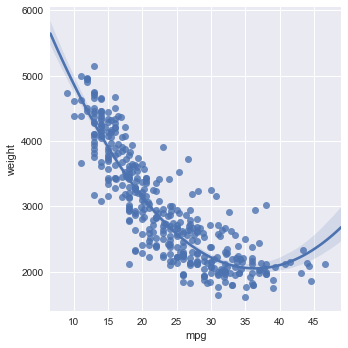

In [137]:
sns.lmplot("mpg", "weight", data, order=2);

# Linear Regression

- split into train and test data

In [169]:
factors = ['cylinders','displacement','acceleration','weight','origin','model_year']
X = pd.DataFrame(auto[factors])
y = auto['mpg']

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [177]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [173]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
y_predicted = reg.predict(X_test)

# PCA

In [159]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [160]:
pca.fit(auto[factors])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [161]:
pca1 = pca.components_[0]
pca2 = pca.components_[1]

In [162]:
transformed_data = pca.transform(auto[factors])
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]

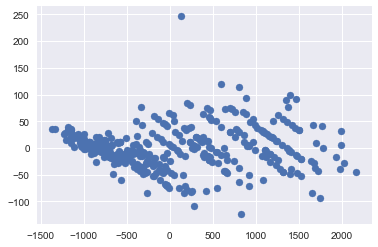

In [117]:
plt.scatter(pc1,pc2)